<a href="https://colab.research.google.com/github/in-seixas/in-seixas_data_science-/blob/master/Imers%C3%A3o_de_Dados_%26_Pharma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <center><img alt="Drug development" width="85%" src="https://image.freepik.com/vetores-gratis/banner-de-desenvolvimento-de-drogas_106317-3650.jpg"></center>

##**Como é o procedimento de descoberta de um novo fármaco?**

No passado muitas drogas foram descobertas ao acaso, por exemplo, o famoso caso da Penicilina, um antibiótico comumente utilizado em ambientes hospitalares. Afinal, quem nunca tomou uma agulhada de Benzentacil? (Penicilina G Benzatina)

Para entender melhor como a penicilina foi descoberta, entre no link [link text](https://www.scielo.br/scielo.php?script=sci_arttext&pid=S1676-24442009000500001)

Mas no decorrer dos anos, as estratégias estão se tornando cada vez mais racionais no processo de **drug discovery**. 

Dessa forma, os ensaios fenótipicos já levaram muitos fármacos ao mercado farmacêutico. Essa abordagem não se preocupa muito em entender os aspectos moleculares, interações químicas ou mecanismo de ação presente de um determinado fármaco. Nesse temática, nós geralmente desconhecemos a estrutura do alvo proteíco ou ligante (droga em estudo) ou de ambas. Mas, existe um foco em outros parâmetros, por exemplo, se houve inibição do crescimento celular, inibição ou superexpressão de um determinado gene, ou seja, observa-se muito se uma determinada característica inerente a um objeto de estudo é influênciada positivo ou negativamente pela presença de um composto ou moléculas.

Outras abordagens são empregadas atualmente, como, o estudo de estruturas proteícas cristalizadas (estrutura 3D de uma proteína). Essa vantagem de obter uma determinada estrutura proteíca é fundamental para entender o mecanismo de ação dos fármacos.

Para aqueles que não entendem muito esse conceito, de forma breve, o mecanismo de ação é o modo como um fármaco vai se ligar, interagir com um sítio de ligação (local onde uma droga pode atuar) em uma determinada proteína. Essa interação química no sítio de ligação de uma proteína pode desencadear uma mudança na conformação proteíca, ou inibição de atividade enzimática etc. 








##**Mas onde a análise de dados entra nesse processo**?

Todos as etapas brevemente discutidas anteriormente geram uma grande quantidade de dados experimentais que precisam ser analisados, discutidos e que possam servir para tomar novas decisões no decorrer da pesquisa. 







<center><img alt="Drug development" width="70%" src="https://media.discordapp.net/attachments/833706173718986817/839111893846196254/drug-discovery.png?width=744&height=419"></center>





A imagem representa o processo de descoberta de novas drogas, o que pode ser visto como alo muito demorado e muito caro. 

Hoje existem centenas de banco de dados de possíveis fármacos ou compostos HITs, assim como, existe também bancos que se referem a moléculas que precisam ser exploradas e filtradas.

Assim, análise de dados torna-se fundamental nesse processo inicial.

###**Objetivo desta análise**

Essa análise tem como objetivo descrever os dados presente nesse dataset.
Inciando com análises que possam entender os tipos de dados presente, se há necessidade de tratamento para análises mais profundas futuramente, assim como, realizar uma breve descrição estatística .

Esse projeto faz parta da Semana de Imersão em Data Science realizada pela Alura [Imersão de Dados](https://www.alura.com.br/imersao-dados).

Esse projeto foi inspirado em um desafio do [Laboratory innovation science at Harvard](https://lish.harvard.edu/) disponibilizando os dados em uma competição no [Kaggle](https://www.kaggle.com/c/lish-moa)








##**Import de bibliotecas necessárias para discussão**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#Pegar a base de dados que irá ser estudada. Isso pode ser feito por meio da função pd.read_csv()
df = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true', compression = 'zip')

In [3]:
#Observar as 5 primeiras entradas. Para isso podemos utilizar a fução pd.head()

df.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [4]:
#Plotar a 5 últimas linhas da tabela

df.tail() #pode ser feito utilizando a função pd.tail()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397,-0.9260,-0.2424,-0.6686,0.2326,0.6456,0.0136,-0.5141,-0.6320,0.7166,...,0.0807,0.4024,-0.0895,0.4420,0.9641,-0.1846,-0.0014,0.3154,-0.2071,-0.6158,-0.2977,0.0992,0.6838,0.5259,0.7882,0.3119,-0.7697,0.2203,-1.0710,0.5979,0.0848,-0.2555,0.6293,1.1660,0.3329,0.2754,0.4108,-0.1252,-0.2340,0.2267,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,0.5112,0.6727,-0.1851,2.8650,-0.2140,-0.6153,0.8362,0.5584,-0.2589,0.1292,0.0148,0.0949,-0.2182,-0.9235,0.0749,-1.5910,-0.8359,-0.9217,0.3013,0.1716,0.0880,0.1842,0.1835,0.5436,-0.0533,-0.0491,0.9543,...,0.1410,1.2640,-0.8663,0.8129,-0.1514,-0.4652,-0.7390,-1.3270,0.9925,1.0570,-0.3355,-0.2555,0.8219,0.6995,-0.2942,0.2408,-0.7781,-0.0929,-0.0329,0.0781,-1.4440,-0.0921,0.3188,-1.1080,0.4895,-0.2144,1.0960,0.3335,0.4444,-1.1130,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,-0.0340,0.4865,-0.1854,0.0716,0.1729,-0.0434,0.1542,-0.2192,-0.0302,-0.4218,0.4057,-0.5372,0.1521,-0.2651,0.2310,-0.8101,0.4943,0.6905,-0.3720,-1.4110,0.4516,1.2300,-0.1949,-1.3280,-0.4276,-0.0040,-0.3086,...,0.6845,0.7127,0.7294,0.4718,-0.2020,0.2783,0.4934,0.4144,0.5449,1.4690,-0.6142,0.6068,0.3434,0.9880,-0.0468,-0.1882,-0.0087,-0.0356,0.5718,0.4971,0.1057,0.2111,0.6992,0.0708,0.6169,0.2248,0.5994,0.2689,0.0305,1.2320,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,0.4299,-0.7985,0.5742,0.1421,2.2700,0.2046,0.5363,-1.7330,0.1450,0.6097,0.2024,0.9865,-0.7805,0.9608,0.3440,2.7650,0.4925,0.6698,0.2374,-0.3372,0.8771,-2.6560,-0.2000,-0.2043,0.6797,-0.0248,-0.0927,...,0.3360,-0.6136,0.5011,0.9261,0.4419,0.0295,0.4220,0.4677,-0.1184,0.4524,0.4135,0.1356,-0.5801,0.0411,1.0240,1.0340,-0.0270,-0.4194,0.7403,-0.6793,-0.1423,0.7307,0.7946,-0.0650,0.9038,0.2324,0.9676,1.0940,0.4290,0.5187,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,-3.6750,-1.2420,0.9146,3.0790,1.2460,1.9460,1.4370,2.9780,2.2370,-0.6818,0.6870,-1.1060,0.0182,-0.9247,-0.0738,-0.1919,-0.7722,-1.4050,-1.0050,-1.1170,-0.5293,-1.1720,-0.2885,0.1599,-0.4250,0.3591,-0.1420,-0.9530,-0.2005,-1.8340,...,-6.9170,-1.8640,-2.5090,-4.7130,-1.7250,-3.8650,-3.0800,-4.1530,-1.2030,-1.1690,-4.1460,-1.2670,-1.1300,-2.4390,0.1591,-2.2490,-2.5860,-1.9520,-2.1810,-4.6690,-3.9450,-2.9560,-2.7930,-2.1560,-2.4100,-1.8190,-3.3480,-0.1414,-2.6430,-2.5810,-3.3890,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520


In [5]:
#Qual o tamanho do meu dataset?

print('Quantidade de Entradas?', f'{df.shape[0]} linhas') #A função df.shape nos direciona as dimensões do dataset
print('Quantidade de Colunas?', f'{df.shape[1]} colunas')

Quantidade de Entradas? 23814 linhas
Quantidade de Colunas? 877 colunas


In [6]:
#Que tipo de informação eu estou trabalhando?

df.dtypes


id             object
tratamento     object
tempo           int64
dose           object
droga          object
               ...   
c-95          float64
c-96          float64
c-97          float64
c-98          float64
c-99          float64
Length: 877, dtype: object

 A maiorida dos dados são do tipo `float`, apenas um dado apresentou-se como `inteiro`.

In [7]:
#Quantidade de tipos diferentes de dados no dataset

df.dtypes.value_counts()

float64    872
object       4
int64        1
dtype: int64

In [8]:
#Vamos ter valores nulos presentes?
df.isnull().sum()

id            0
tratamento    0
tempo         0
dose          0
droga         0
             ..
c-95          0
c-96          0
c-97          0
c-98          0
c-99          0
Length: 877, dtype: int64

Por se tratar de um dataset já limpo, era esperado que não encontrasse valores ausentes.

In [9]:
#Quem são tratamentos e quantos possuem?

df.tratamento.value_counts() #Afunção pd.values_counts() consegue me mostrar a quantidade de dados categóricos presente em minha série.

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

A váriavel `com_drogas` apresenta um `N` muito maior em relação à variável `com_controle`. Ou seja, a quantidade de `teste/investigação` foi muito superior ao número de controle ou valor a ser comparado.

Tempo medido no estudo:
48    8250
72    7792
24    7772
Name: tempo, dtype: int64


''

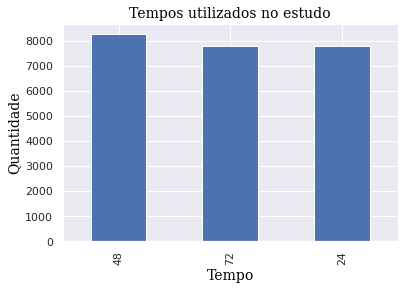

In [42]:
#Quais são os tempos do estudo?

sb.set()

tempo = df.tempo.value_counts().sort_values(ascending = False)
print('Tempo medido no estudo:')
print(tempo)

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }

tempo.plot(kind='bar')
plt.xlabel('Tempo', fontdict= font)
plt.ylabel('Quantidade', fontdict= font)
plt.title('Tempos utilizados no estudo', fontdict= font)
;
;  

Eu tenho presente em estudo, os tempos de 24, 72 e 48 (unidade/tempo ainda desconhecida). O tempo de 48 h foi o de mais presente na pesquisa.

In [11]:
#Quais são as doses e quantos possuem?

df.dose.value_counts()


D1    12147
D2    11667
Name: dose, dtype: int64

Aqui podemos observar que os valores das `doses` são mais próximos do que os valores das variáveis `tratamento` 

In [12]:
#Quais drogas estão presentes no estudo e quantas são?

df.droga.unique()

array(['b68db1d53', 'df89a8e5a', '18bb41b2c', ..., '573c787a2',
       'b2fe3eca7', 'dd4a96d16'], dtype=object)

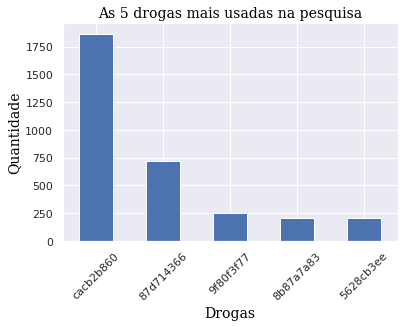

In [13]:
#Quais as drogas mais prevalentes?

sb.set()

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }

drugs = df.droga.value_counts().sort_values(ascending = False)[:5]


plt.figure(figsize=(6,4))
drugs.plot(kind = 'bar')
plt.xlabel('Drogas', fontdict= font)
plt.ylabel('Quantidade', fontdict= font)
plt.title('As 5 drogas mais usadas na pesquisa', fontdict= font)
plt.xticks(rotation= 45);


A droga mais utilizada foi `cacb2b860`

In [14]:
#Proporção entre o grupo tratamento e as doses aplicadas.
prop_trat = round(df.groupby('tratamento')['dose'].value_counts(normalize = True)*100,2)
prop_trat_order = prop_trat.sort_values(ascending=False)
prop_trat_order

tratamento    dose
com_droga     D1      51.01
com_controle  D1      50.96
              D2      49.04
com_droga     D2      48.99
Name: dose, dtype: float64

Agora é possível exemplificar melhor com  o delineamento do experimento foi feito. Divisão em dois grupos tratamentos, sendo que dentro de cada grupo foi aplicado dois tipos de doses. 

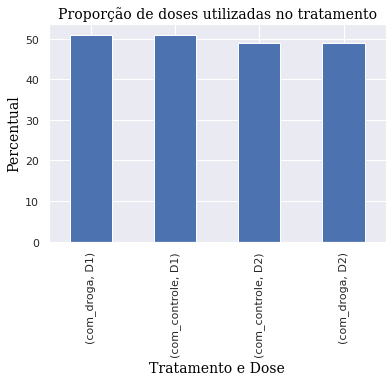

In [15]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }

sb.set()
fig, ax = plt.subplots()
prop_trat_order.plot(kind='bar')
ax.set_xlabel(fontdict= font , xlabel= 'Tratamento e Dose')
ax.set_ylabel(fontdict= font, ylabel= 'Percentual')
ax.set_title(fontdict= font, label = 'Proporção de doses utilizadas no tratamento')
plt.subplots_adjust(left=0.12)
plt.show()

Aqui nós conseguimos observar que existe um balanceamento dos valores de dose aplicada entre os tipos de dose e tratamento. 

In [16]:
#Mudar os nomes das colunas: retirar "-", por exemplo: 'g-0' --> 'g0'

#pegar todos os nomes das variáveis
for name in df.columns:
  #Excluir os espaços entre o '-' 
  exclude_space = name.strip()
  #Excluir o '-'
  rename = exclude_space.replace("-", "")
  #Condicional que me permite confirmar se os nomes estão corretos dentro das colunas
  if name in df.columns:
    #salvar as mudanças realizadas nas colunas. 
    df.columns = df.columns.str.replace(name, rename)
  


In [17]:
df.columns #A função pd.columns retorna os nomes das variáveis presentes na coluna

Index(['id', 'tratamento', 'tempo', 'dose', 'droga', 'g0', 'g1', 'g2', 'g3',
       'g4',
       ...
       'c90', 'c91', 'c92', 'c93', 'c94', 'c95', 'c96', 'c97', 'c98', 'c99'],
      dtype='object', length=877)

In [48]:
#Vamos observar o resumo gerado pela função describe(). Média, Desvio Padrão, Mediana e Quartis (25 e 75%) são pontos que podem observados. 

df.describe()

,tempo,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,g35,g36,g37,g38,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,0.182307,0.143203,0.209402,-0.173884,-0.024432,0.126823,-0.146663,0.087687,-0.082982,-0.111908,-0.087379,0.047548,-0.117474,-0.113212,-0.052746,-0.091055,0.112176,-0.046458,-0.076239,-0.197699,0.382177,-0.189432,0.078791,-0.093312,0.135729,-0.188616,-0.606710,0.534425,...,-0.517397,-0.360770,-0.435752,-0.613591,-0.402083,-0.619682,-0.452265,-0.497164,-0.413836,-0.277029,-0.547845,-0.358611,-0.442906,-0.475194,-0.010404,-0.467001,-0.276963,-0.455848,-0.412918,-0.456404,-0.472514,-0.505481,-0.492735,-0.446836,-0.463029,-0.409310,-0.333124,-0.295009,-0.328342,-0.401615,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,1.253604,1.234590,1.273068,1.247178,0.659839,1.418997,1.179688,0.743301,0.844796,1.219529,0.824401,0.924838,0.760159,1.203186,0.866977,1.103765,1.001687,1.027758,1.279399,1.302567,1.559174,0.933514,1.172270,1.174325,1.061719,1.397677,2.200277,2.003317,...,2.122318,1.710725,1.898871,2.307820,1.785055,2.225596,1.991021,2.063896,1.887001,1.459639,2.187835,1.730634,1.924716,2.021927,1.029820,2.004317,1.429340,1.924263,1.888788,1.832863,2.011396,2.091353,2.055624,1.987476,2.014045,1.883974,1.647241,1.634073,1.663170,1.832794,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,-5.870000,-8.587000,-5.018000,-10.000000,-10.000000,-10.000000,-10.000000,-4.226000,-10.000000,-10.000000,-5.700000,-10.000000,-10.000000,-10.000000,-8.272000,-8.184000,-4.835000,-7.913000,-10.000000,-10.000000,-2.956000,-8.356000,-7.182000,-10.000000,-9.261000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.839000,-10.000000,-10.000000,-10.000000,-10.000000,-6.452000,-10.000000,-9.938000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,-0.489675,-0.447500,-0.481200,-0.607975,-0.404150,-0.391950,-0.513775,-0.272200,-0.488675,-0.524600,-0.538900,-0.440375,-0.


É possível observar de maneira geral que os valores a partir da variável `g0` se distribuem em sua maior parte (`75%`) abaixo de 0.7. É possível observar também que o máximo do valores estão muito discrepantes em relação a média e mediana. Podem ser considerados outliers? Vamos continuar a investigação! 


Para exemplificar um pouco mais, vamos selecionar somente a variável `g0` até `c99`

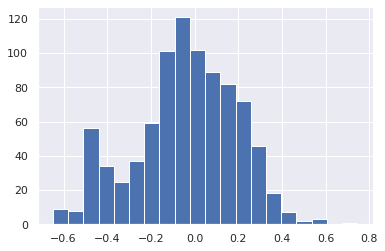

In [46]:
#Distribuição dos valores da coluna g0 ----> c99

df.loc[:, 'g0':'c99'].describe().T['mean'].hist(bins = 20)

Nesse gráfico de histograma, nós podemos observar que a média dados de g0 até  c99 estão distribuidos normalmente em uma faixa de -0.6 até 0.8. 



Vamos aprofundar mais um pouco, selecionando somente a variávell `g0` e gerar um gráfico de boxplot



Descrição estatística count    23814.000000
mean         0.248366
std          1.393399
min         -5.513000
25%         -0.473075
50%         -0.008850
75%          0.525700
max         10.000000
Name: g0, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


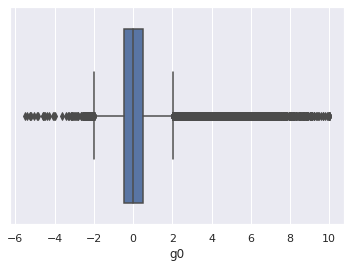

In [19]:
#Esse tipo seleção é muito relacionada ao que se chama de query em Pandas. 

print('Descrição estatística', df.g0.describe())
sb.boxplot(df.g0);

Com os dados acima, e o gráfico de boxplot, é possível observar que existem valores aos extremos do negativo e positivo. Sendo muito discrepante em realção a tendência central dos dados. Temos resultados para o `g0` que estão flutuando de -6 a 10. 

Vamos especificar mais um pouco essa análise, filtrando os valores para abaixo de 0.5, o que representa 75% dos dados.

In [20]:
#Query
# Como os 75% dos dados para g0 apresentam-se abaixo de 0.5, nós iremos filtrar o dataset para valores abaixo desse corte.

dados_filt = df[df['g0'] < 0.5]
print(dados_filt.g0.max())

0.4997


Com o filtro aplicado, nossa série agora possui o valor máximo de 0.4997

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


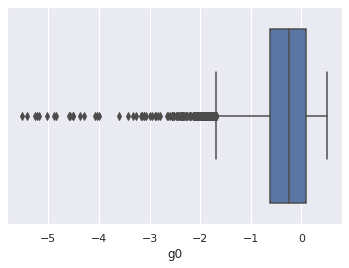

In [21]:
#Open 

sb.boxplot(dados_filt.g0);

In [22]:
dados_filt.g0.describe()

count    17648.000000
mean        -0.307999
std          0.531580
min         -5.513000
25%         -0.620950
50%         -0.240000
75%          0.089200
max          0.499700
Name: g0, dtype: float64


Essa é a primeira parte de um projeto maior.

Aprendizados foram obtidos nessa parte inicial, desde aprofundamento em funções da biblioteca Pandas até pequenas discussões estatíticas.


